In [1]:
import numpy as np
from numpy import array
from scipy.linalg import svd


In [3]:
A=array([[1,0,0,0,2],[0,0,3,0,0],[0,0,0,0,0],[0,4,0,0,0]])

SVD

In [6]:
U,d,Vt=svd(A)
print(U)


[[ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 1.  0.  0.  0.]]


In [8]:
print(d)

[4.         3.         2.23606798 0.        ]


In [10]:
print(Vt)

[[-0.          1.          0.         -0.          0.        ]
 [-0.          0.          1.         -0.          0.        ]
 [ 0.4472136  -0.         -0.         -0.          0.89442719]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


In [12]:
print(np.diag(d))

[[4.         0.         0.         0.        ]
 [0.         3.         0.         0.        ]
 [0.         0.         2.23606798 0.        ]
 [0.         0.         0.         0.        ]]


SVD applying to the dataset

In [15]:
import pandas as pd
data=pd.read_excel("University_Clustering.xlsx")
data.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [17]:
data=data.iloc[:,2:] #removes non numeric data
data

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [19]:
from sklearn.decomposition import TruncatedSVD

In [20]:
svd=TruncatedSVD(n_components=3)
svd.fit(data)
result=pd.DataFrame(svd.transform(data))
result.head()

,0,1,2
0,22737.587399,454.514059,-25.702416
1,63583.170928,-990.046543,12.221911
2,25055.946462,315.640243,24.117560
3,31537.214404,119.844228,-8.256362
4,21897.045349,456.472762,-13.370650


In [21]:
result.columns="pc0","pc1","pc2"
result.head()

,pc0,pc1,pc2
0,22737.587399,454.514059,-25.702416
1,63583.170928,-990.046543,12.221911
2,25055.946462,315.640243,24.117560
3,31537.214404,119.844228,-8.256362
4,21897.045349,456.472762,-13.370650


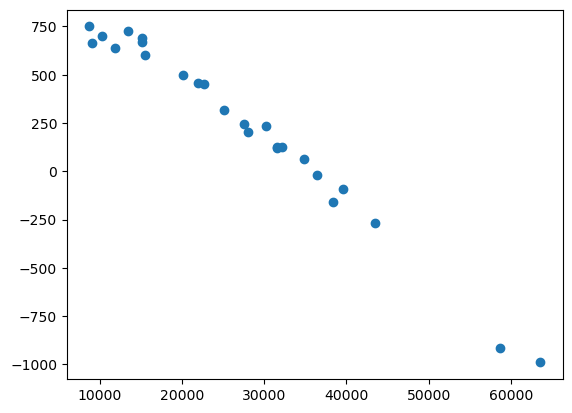

In [25]:
#Scatter diagram
import matplotlib.pylab as plt
plt.scatter(x=result.pc0,y=result.pc1)